<a href="https://colab.research.google.com/github/formacionCDIA/cursoCDIA/blob/main/Notebooks/2_An%C3%A1lisis_Exploratorio_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Ciencia de datos e Inteligencia Artificial**
---
# **2. Análisis Exploratorio de datos**

## 🎯 Manipulación de datos

## 🥇 Pandas


Para cargar la librería `pandas` y comenzar a trabajar con ella, importar.

In [ ]:
import pandas as pd # Importar pandas con el alias pd

El alias acordado por la comunidad es `pd`. Se asume como una práctica estándar para toda la documentación de Pandas.

### Estructuras de datos
Para comenzar a usar la librería, es importante familiarizarse con sus dos estructuras de datos principales:

* **Series**
* **DataFrame**


#### Series


La serie más simple se forma a partir de una lista de datos.


In [ ]:
s = pd.Series([4, 17, -51, 3], name='Serie A') # Crear serie a partir de una lista = [4, 17, -51, 3]
s

Como no especificamos un índice para los datos, se crea uno predeterminado que consta de los números enteros del 0 al N - 1 (donde N es la cantidad de valores). Para el ejemplo la serie tiene una colección de *N=4* valores, el nombre de la serie es *Serie A* y el indice es una colección de enteros de 0 a 3.

Para acceder a la colección de valores y al indice considerar los atributos de la serie `value` e `index` respectivamente:

In [ ]:
s.values # Acceder a la colección de valores

In [ ]:
s.index # Acceder a la colección de etiquetas. Indice


Si necesitas reforzar sobre las estructuras de datos en Python, mirar la notebook **Soporte en CD e IA** de este curso o clicar en [Estructura de datos de la documentación oficial de Python](https://docs.python.org/es/3/tutorial/datastructures.html).

📝 **Ejercicio**

Crea tu primera Serie desde la lista [0,'A','B', 4, 2] . Guardar la serie con el nombre de variable `tiposdedatos_s`.

```
tiposdedatos_s = ...
```



In [ ]:
# Ejercicio



**Haz doble click para ver la respuesta**

<!--
# Crear serie
tiposdedatos_s = pd.Series( [0,'A','B', 4, 2])

# Mostrar
tiposdedatos_s
 -->

A menudo se desea crear una serie con un índice que identifique cada punto de datos:


In [ ]:
s = pd.Series ([4, 17, -51, 3], name='Serie A', index=['d', 'b', 'a', 'c']) # Crear serie

s

In [ ]:
s.values

In [ ]:
s.index


In [ ]:
s['a'] # Seleccionar el elemento asociado al valor del indice 'a'


In [ ]:
s[['c', 'a', 'd']] # Seleccionar el elemento asociado al valor del indice 'a'


In [ ]:
print('Serie original:\n', s)

s['d'] = 6 # Modificar el valor asociado al valor del indice 'd'

print('\nSerie modificada:\n', s)

Las operaciones de array de NumPy, también se aplican en serie, como el filtrado con operadores relacional, la multiplicación por escalar o la aplicación de funciones matemáticas, que preservan el vínculo índice-valor:

In [ ]:
s

In [ ]:
s[s > 0] # Filtrar los valores mayores a 0. Máscaras

In [ ]:

s * 2 # Multiplicar por escalar 2

In [ ]:
s.sum() # Sumar todos los valores. Funciona por ser valores númericos

En este curso, no exploramos la librería NumPy pero si deseas hacerlo, clicar en [documentación oficial](https://numpy.org/doc/stable/index.html).

In [ ]:
import numpy as np # Importar librería de Numpy para usar sus funciones definidas
np.exp(s) # Función exponencial

Si tiene datos contenidos en un diccionario de Python, puede crear una serie a partir de ellos pasando el diccionario:

In [ ]:

superficie_dict = {'Buenos Aires': 305907.4,
                   'Córdoba': 164707.8, # Por cada nombre de provincia un valor de superficie [km²] asociado.
                   'Salta': 155340.5,
                   'Tucumán': 22592.1,
                   'La Rioja': 91493.7
                   }

superficie_s = pd.Series(superficie_dict) # Serie desde dict

superficie_s

Cuando solo se pasa un diccionario, el índice de la serie resultante se forma con las claves del diccionario en el orden generado.


In [ ]:

provincias = ['Buenos Aires', 'Córdoba', 'Salta', 'Misiones']

superficie_s2 = pd.Series(superficie_s, index=provincias) # Crear serie desde un diccionario e indice

superficie_s2

En este caso, se colocaron 3 valores encontrados en superficie_s en las ubicaciones correspondientes, pero como no se encontró ningún valor para 'Misiones', aparece como `NaN` (Not a Number), que es la manera de identificar valores faltantes en Pandas. El tópico **Valores faltantes** lo veremos en un módulo propio. Por lo pronto te mencionamos dos funciones de las series para detectarlos `isnull` y `notnull`  :

In [ ]:
pd.isnull(superficie_s2)

In [ ]:
superficie_s2.isnull()

In [ ]:
pd.notnull(superficie_s2)

In [ ]:
superficie_s2.notnull()

#### DataFrame


Vamos a construir dos objetos series:

- `superficie_s`, a partir de un diccionario. Retomamos el ejemplo anterior.

- `Poblacion_s`, a partir de dos listas

Luego construimos el DataFrame `provincia_df` a partir de las dos Series.

In [ ]:

superficie_dict = {
    'Buenos Aires': 305907.4, # Por cada nombre de provincia un valor de superficie [km²] asociado.
    'Córdoba': 164707.8,
    'Salta': 155340.5,
    'Tucumán': 22592.1,
    'La Rioja': 91493.7}


superficie_s = pd.Series(superficie_dict, name = 'superficie') # Serie desde dict y le agregamos el nombre
superficie_s

In [ ]:
provincia_lista = ['Buenos Aires','Salta','Córdoba', 'Tucumán', 'La Rioja'] # Crear lista 1

provincia_pop = [17541141, 1424397, 3760450, 1694656, 393531] # Crear lista 2

poblacion_s = pd.Series(provincia_pop, index= provincia_lista, name= 'poblacion')

poblacion_s

In [ ]:
print('Colección de valores:',poblacion_s.values) # Mirar atributos de Series
print('Colección de etiquetas (indice):',poblacion_s.index)

Para crear un DataFrame desde un diccionario, tener en cuenta que las claves son las etiquetas de las columnas y los valores son los valores de las colecciones asociadas. Para el ejemplo son los valores de las series creadas previamente.

In [ ]:
provincia_df = pd.DataFrame({'Poblacion':poblacion_s,
                             'Superficie_km2':superficie_s
                             })# Crear Dataframe


In [ ]:
provincia_df

📝 **Ejercicio**

Crea tu primer DataFrame desde un diccionario. Llamar al objeto DataFrame con el nombre  `estudiantes_df`. Utilizar el siguiente código:

```
# Importar librería numpy para llamar a random
import numpy as np

# Diccionario est_d

est_d = {
  'Nombre': ['Lucas','Marcela','Fede','Sol','Sol'],
  'Edad': [49, 26, 37, 40, 35],
  'GradoAcademico': ['Bachiller','Licenciado','Magister','Doctorado','Licenciado']
}
```




In [ ]:
# Ejercicio



**Haz doble click para ver la respuesta**
<!--
# Importar librería numpy para llamar a random
import numpy as np

# Diccionario est_d

est_d = {
  'Nombre': ['Lucas','Marcela','Fede','Sol','Sol'],
  'Edad': [49, 26, 37, 40, 35],
  'GradoAcademico': ['Bachiller','Licenciado','Magister','Doctorado','Licenciado']
}

# Crear DataFrame
estudiantes_df = pd.DataFrame(est_d)

# Mostrar
estudiantes_df
-->

Las columnas de `provincia_df` tienen diferentes tipos de datos:


In [ ]:
provincia_df.dtypes # Llamar al atributo dtypes

🔎 **Nota**

En su mayor parte, Pandas utiliza arrays y tipos de datos de NumPy para las series o las columnas individuales de un DataFrame. NumPy ofrece compatibilidad con float, int, bool, timedelta64[ns] y datetime64[ns]. Para más información click en [dtypes en documentación oficial de Pandas](https://Pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes) (inglés).

**Atributos y datos subyacentes de DataFrame**

In [ ]:
provincia_df.shape # para informar sobre la cantidad de filas y columnas

In [ ]:
provincia_df.index # para informar el índice (etiquetas de fila)

In [ ]:
provincia_df.columns # para informar las etiquetas de las columnas

In [ ]:
provincia_df.values # para informar los valores, N-array.


### Indexación y selección de datos
---


Cada columna en un `DataFrame` es una `Serie`. Para acceder a una columna :

In [ ]:
provincia_df['Poblacion'] # Acceder a los datos de la columna cuya etiqueta es 'Poblacion'


In [ ]:
print('Valores de la serie' , provincia_df['Poblacion'].values)
print('Suma de los valores de la serie' , provincia_df['Poblacion'].sum())


Otra forma, es llamando a la columna como atributo del objeto. Tener en cuenta el '.'

In [ ]:
provincia_df.Poblacion

In [ ]:
provincia_df['Poblacion']['Buenos Aires']# Acceder al dato de la columna cuya etiqueta es 'Poblacion' y fila cuya etiqueta es 'Buenos Aires' (ver indice del DataFrame)


In [ ]:
# Otra forma
#provincia_df.Poblacion['Buenos Aires']

Las filas también se pueden recuperar por posición o nombre mediante un par de métodos. Usando las posiciones y el método `iloc` o las etiquetas y el método `loc`.

`iloc` se basa principalmente en la posición de números enteros pero también se puede utilizar con un array booleano.

**Indexación de sola las filas**

In [ ]:
provincia_df.iloc[0] # Fila en la posicion 0 . En este caso la fila es la asociada a Buenos Aires

In [ ]:

provincia_df.iloc[[0,3]] # Acceder a una lista de filas, filas de la posición 0 y posición 3


In [ ]:
provincia_df.iloc[:3:] # acceder a las filas mediante corte (slice)  [ini:fin:pasos]


In [ ]:
provincia_df.iloc[[True, False, False, False, False]] # Con una máscara booleana de la misma longitud que el índice. En este caso indice es para las 5 filas


**Indexación por fila y columna**

Puedes combinar los tipos de indexadores para el índice y las columnas.

In [ ]:
provincia_df.iloc[0 , 1] # datos de la fila en posición 0 y columna en posición 1


In [ ]:
provincia_df.iloc[[0,2] , 1] # datos de las filas en posición 0 y 2, columna en posición 1


In [ ]:
provincia_df.iloc[:3, :1] # Con objeto de corte filas y columnas [ini:fin:pasos , ini:fin:pasos]


`loc` permite el acceso a un grupo de filas y columnas por etiqueta(s) o un array booleano.

In [ ]:
provincia_df

In [ ]:
provincia_df.loc['Salta'] # Por etiqueta de fila (indice)

In [ ]:
provincia_df.loc[['Salta','Buenos Aires']] # Por lista de etiquetas de filas


In [ ]:
provincia_df.loc['Salta' ,'Poblacion'] # Por etiqueta de fila y columna [ etiqueta fila (indice) , etiqueta columna ]


In [ ]:
provincia_df.loc[['Salta','Buenos Aires'], ['Poblacion']] # Por lista de etiquetas [filas, columnas]

In [ ]:
provincia_df.loc[:'Salta':, :'Poblacion'] # Por objeto de corte

In [ ]:
provincia_df.loc[[True, False,False,False,False],[True,False]] # Por lista booleana con la misma longitud que el eje de filas o columnas

* La principal diferencia que existe entre loc e iloc es que en loc se usan las etiquetas (los nombres asignados tanto a las filas como a las columnas) mientras que en iloc se usan las posiciones de los elementos (la posición en la fila o la columna, comenzado a contar en 0).

Podemos indexar un DataFrame usando loc y máscaras booleanas


In [ ]:
provincia_df['Superficie_km2'] > 148008 # Filtrar por operador relacional. 'Superficie_km2' > 148008

In [ ]:
provincia_df.loc[
  provincia_df['Superficie_km2'] > 148008,
  ['Poblacion', 'Superficie_km2']
                 ] # Por máscara

In [ ]:
provincia_df.loc[
    provincia_df['Superficie_km2'] > 148008,
    ['Poblacion']]

📝 **Ejercicio**

Para el DataFrame `provincia_df`, seleccionar las filas cuyos valores de la  columna 'Poblacion' sean mayor o igual a 3 millones (3000000) .



In [ ]:
# Ejercicio



**Haz doble click para ver la respuesta**

<!--
provincia_df.loc[provincia_df['Poblacion'] > 3000000]
-->

Si se desea guardar los datos filtrados del `Dataframe` se puede asignar el resultado del filtrado a una variable

In [ ]:

provincia_cota_df = provincia_df.loc[ # Nuevo DataFrame
    provincia_df['Superficie_km2'] > 148008,
    ['Poblacion']
    ]

# Mostrar
provincia_cota_df

### Funciones aritméticas y mapeo con Pandas
---

In [ ]:
provincia_df

Operaciones aritméticas

In [ ]:
provincia_df['Superficie_km2'] + 10 # Sumar por escalar

In [ ]:
provincia_df['Poblacion'] / provincia_df['Superficie_km2'] # Dividir los valores de la columna ' Poblacion' por la columna 'Superficie_km2'


Funciones aritméticas

In [ ]:
provincia_df.sum(axis=0) # Sumar los valores sobre el eje solicitado. Por defecto se aplica sobre las filas.


En Pandas:

* axis=0 significa a lo largo de "índices". Es una operación por filas.
* axis=1 significa a lo largo de "columnas". Es una operación por columnas.

In [ ]:
provincia_df.mean() # Calcular la Media de los valores sobre el eje solicitado. Por defecto se aplica sobre las filas.


Todas las columnas son númericas, por eso no tira error al aplicar `mean()` sobre todo los valores del ``DataFrame`.

In [ ]:
(provincia_df - provincia_df.mean()) / provincia_df.std() # Combinar operaciones. Estandarización (representar los datos con una media cero y una desviación estándar de 1), de forma muy concisa:


`map` aplica una función a un DataFrame elemento por elemento.
Este método aplica una función que acepta y devuelve un escalar a cada elemento de un DataFrame.

Podemos hacerlo utilizando funciones "lambda". Se utilizan para crear funciones anónimas. La expresión es:

```
lambda argumento(s) : expresion
```
Genera un objeto de función. El objeto sin nombre se comporta como un objeto de función definido con:

```
def <lambda>(parametros):
    return expresion
```
Para más información sobre `lambda`, click en [expresiones lambda en documentación oficial](https://docs.python.org/3/reference/expressions.html#lambda)


In [ ]:
# con funciones lambda.
provincia_df.map(lambda x: round(x,2))

In [ ]:
# También es posible utilizar el mapa con funciones que no son funciones lambda:
provincia_df.map(round, ndigits=1)

 `apply`es una función a lo largo de un eje del DataFrame.

Los objetos que se pasan a la función son objetos series cuyo índice es el índice del DataFrame (axis=0) o las columnas del DataFrame (axis=1).

Para más información, click en [apply en documento oficial](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)

In [ ]:
# Numpy
import numpy as np

# Aplicar suma por eje fila, axis = 0.
provincia_df.apply(np.sum, axis=0)

In [ ]:
# Aplicar suma por eje fila, axis = 1.
provincia_df.apply(np.sum, axis=1)

In [ ]:
provincia_df['Superficie_km2'].apply(round,ndigits=1)

### ✍ Recordatorio

* Importar el paquete, también conocido como `import pandas as pd`

* Una tabla de datos se almacena como un `DataFrame` de pandas

* Cada columna de un `DataFrame` es una `Series`

* Puedes hacer operaciones sobre los datos aplicando un método a un `DataFrame` o una `Series`


## 🥇 Manipulación de datos


Python se ha convertido en un lenguaje muy apreciado para la manipulación de textos y archivos debido a su sintaxis sencilla para interactuar con archivos, estructuras de datos intuitivas y funciones prácticas para procesar los datos.

A continuación exploraremos e integraremos tecnologías con Python para responder:

* Importar y exportar conjuntos de datos.
* Ordenar los conjuntos de datos y remodelar su estructura en un formato adecuado para el análisis.




###  ¿Cómo leer y ecribir datos tabulares?


#### Importar archivos


Para explorar los métodos de Pandas `read_*` vamos a utilizar el conjunto de datos denominados *winemag-data-130k-v2*.

* Recuerda: Para acceder a los datos del curso [Github](https://github.com/formacionCDIA/cursoCDIA/tree/main/Data)

##### Archivos csv


In [ ]:
import pandas as pd # Importar librería

In [ ]:
url_base = 'https://raw.githubusercontent.com/formacionCDIA/cursoCDIA/main/Data/'

nombre_archivo = 'winemag-data-130k-v2.csv'
ruta_archivo = url_base + nombre_archivo

In [ ]:
datosCSV_df = pd.read_csv(ruta_archivo) # Leer el achivo csv, el argumento por defecto sep = ‘,’
datosCSV_df.head() # Mostrar los primeros registros del dataframe.

Otra opción para evitar columnas

In [ ]:
datosCSV_df = pd.read_csv(ruta_archivo, index_col='Unnamed: 0')

datosCSV_df.head()

Para más información click en [read_csv en documentación oficial](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

##### Archivos Excel


In [ ]:
nombre_archivo = 'winemag-data-130k-v2.xlsx'
ruta_archivo = url_base + nombre_archivo


In [ ]:
datosXLSX_df = pd.read_excel(ruta_archivo) # sheet_name='hoja1'
datosXLSX_df.head()

Leer archivos Excel con varias hojas no es tan diferente. Solo tienes que especificar un argumento adicional, `sheet_name`, en el que puedes pasar una cadena para el nombre de la hoja o un número entero para la posición de la hoja.

Para más información sobre métodos de lectura click en [Funciones de lectura](https://pandas.pydata.org/docs/user_guide/io.html) y  [read_excel en documentación oficial](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)



#### Exportar archivos
---

Pandas te permite exportar datos a varios formatos. Esto ocurre especialmente cuando los datos se transforman mediante pandas y necesitan guardarse localmente en tu máquina. A continuación se explica cómo convertir los DataFrames de pandas a csv y excel.

`to_csv()`


In [ ]:
datosCSV_df.to_csv("winemag-data-130k-v2_DF.csv", index=False) # Se guardá en carpeta actual

`to_excel()`

Considerar los formatos “.xls” o “.xlsx”.


In [ ]:
datosXLSX_df.to_excel("winemag-data-130k-v2_DF.xlsx", index=False) # Se guardá en carpeta actual

📝 **Ejercicio**

Leer el archivo csv que se encuentra en:


In [ ]:
url_base = 'https://raw.githubusercontent.com/formacionCDIA/cursoCDIA/main/Data/'
nombre_archivo = 'PredictStudents_data.csv'
ruta_archivo = url_base + nombre_archivo
ruta_archivo

Guardar los datos en un objeto DataFrame 'data_df'. El separador del archivo es sep= ';'.


In [ ]:
# Solución




**Haz doble click para ver la respuesta**

<!--
import pandas as pd

# https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
data_df = pd.read_csv(ruta_archivo, sep=';')
data_df
 -->

### ¿Cómo empezar a explorar un conjunto de datos en un `DataFrame` ?


Continuaremos trabajando con el conjunto de datos `winemag-data-130k-v2.csv`.


* Los datos fueron escrapeados de el sitio WineEnthusiast en el año 2017.
* Presentan 129971 reseñas de vinos con características sobre la variedad, ubicación, bodega, precio y descripción del vino.

Para más información clicar en [Reseña de vino en Kaggle](https://www.kaggle.com/zynicide/wine-reviews/)

**Descripción del conjunto de datos**
* country: El país de origen del vino.
* description
* designation: El viñedo dentro de la bodega de donde provienen las uvas que hicieron el vino.
* points: La cantidad de puntos que WineEnthusiast calificó al vino en una escala de 1 a 100 (aunque dicen que solo publican reseñas de vinos que puntúan &gt;=80).
* price: El costo de una botella de vino.
* province: La provincia o estado de donde proviene el vino.
* region_1: La zona de cultivo de vino en una provincia o estado (por ejemplo, Napa).
* region_2: A veces, hay regiones más específicas especificadas dentro de una zona de cultivo de vino (por ejemplo, Rutherford dentro del Valle de Napa), pero este valor a veces puede estar en blanco.
* taster_name
* taster_twitter_handle
* title: El título de la reseña del vino.
* variedad: El tipo de uva utilizada para hacer el vino (por ejemplo, Pinot Noir).
* winery: La bodega que elaboró ​​el vino.

In [ ]:
import pandas as pd

In [ ]:
url_base = 'https://raw.githubusercontent.com/formacionCDIA/cursoCDIA/main/Data/'

nombre_archivo = 'winemag-data-130k-v2.csv'

ruta_archivo = url_base + nombre_archivo # Especificar ruta de archicvo csv

In [ ]:
reseVino_df = pd.read_csv(ruta_archivo, index_col='Unnamed: 0')

In [ ]:
reseVino_df.head() # Ver 5 primeras filas

In [ ]:
reseVino_df.tail() # Ver las últimas 5 filas

Si quiero especificar la cantidad de filas a ver.

In [ ]:
reseVino_df.head(2) # Primeras 2 filas

tail()

In [ ]:
reseVino_df.tail(10) # Ver 10 últimas filas

Un atributo ya visto de un `Dataframe` es `dtypes`

In [ ]:
reseVino_df.dtypes # Ver tipos de datos

En base a los tipos de datos que se cargaron en el Dataframe:
* país, descripción, designación, provincia, región_1, región_2, catador_nombre,
catador_usuario_twitter, título, variedad, bodega son tipos de datos categorícos, que en python se pueden identificar como de tipo cadena (objeto). Aunque lo ideal sería transformarlos en `category`. Lo veremos más adelante.
* puntos y precio son númericos, punto es entero y precio continuo.

A simple vista, este conjunto de reseña de vino, estaría cargado correctamente. Para verificar que estos datos estan correctos,trabajar con la documentación asociada.

Para reforzar los tipos de datos en python ver las sección de Fundamentos.

Para obtener un resumen técnico del objeto `reseVino_df` que almacena al conjunto de datos, usar el método `info()`

In [ ]:
reseVino_df.info()

En base a la información compartida por `info`:

* Hay 129971  entradas, es decir, 129971  filas.

* Cada fila tiene una etiqueta de fila (índice) con valores que van de 0 a 129970.

* La tabla tiene 13 columnas. Serían pocas las columnas que tienen el total de valores, es decir, 129971 valores no nulos o faltantes, estás son  las columnas `description`(descripción),`points`(puntos),`title`(título)y `winery`(bodega). En el resto habría valores faltantes.  
* Existin distintos tipos de datos de Pandas en el conjunto de datos, objetos, númericos enteros y continuos.

* La cantidad aproximada de RAM utilizada para almacenar el DataFrame es de  13.9+ MB.

In [ ]:

def resumen_inicial(datos):
  """
  Informa sobre la estructuración de los datos en el objeto DataFrame.

  Parámetros:
      datos: Objeto de dato, Dataframe.
  Retorno:
      impresiones en pantalla
  Ejemplo:
          >>> resumen_inicial(df)

  """
  print("Primeras 2 filas")
  display(datos.head(2))
  print("-----------------------------------------------------------------")
  print("Nombres de columnas")
  display(datos.columns)
  print("-----------------------------------------------------------------")
  print("Dimensión")
  display(datos.shape)
  print("-----------------------------------------------------------------")
  print("Resumen técnico")
  display(datos.info())
  print("-----------------------------------------------------------------")




Existen distintas funciones para explorar el conjunto de datos en el DataFrame. Teniendo en cuenta la función creada `resumen_inicial`, ordenamos la información que proporcionan diferentes métodos de Pandas.

In [ ]:
resumen_inicial(reseVino_df)

### ¿Cómo seleccionar un subconjunto de datos de un DataFrame?
---

Deseamos seleccionar los puntos asignados a los vinos (points). Recordemos
points representa la cantidad de puntos que WineEnthusiast calificó al vino en una escala de 1 a 100 (aunque dicen que solo publican reseñas de vinos que puntúan >=80).


In [ ]:
punto = reseVino_df["points"] # Seleccionar característica. Guardar serie.

punto.head() # Ver los primeros 5 valores

Cada columna de un DataFrame es una serie. Si se selecciona una sola columna, el objeto devuelto es una serie de pandas.

Ahora nos interesa los points (puntos) y el country (país) de los vinos del conjunto de datos. Recordemo  que country representa el país de origen del vino.

In [ ]:
reseVino_df[["country","points"]] # Seleccionar valores de pais y punto del conjunto de datos


La selección devolvió un DataFrame. Para verificarlo, se puede utilizar la función de Pandas `type`

In [ ]:
type(reseVino_df[["country","points"]])

Vimos que en en Pandas podemos filtrar por máscara.
Seleccionamos todos los vinos con cuyo puntos correspondan al máximo punto del conjunto de datos.


Busco el valor máximo en puntos.

In [ ]:
reseVino_df["points"].max() # Llamar a la función max

In [ ]:

max_mascara = reseVino_df["points"] == reseVino_df["points"].max() # Definir la máscara de filtro
max_mascara



La salida de la expresión condicional (==, pero también  !=, <,>, <=,… funcionaría) es en realidad una serie de valores booleanos de pandas (ya sea Verdadero o Falso) con la misma cantidad de filas que el DataFrame original. Dicha serie de valores booleanos se puede utilizar para filtrar el DataFrame colocándolo entre los corchetes de selección []. Solo se seleccionarán las filas para las que el valor sea Verdadero.

In [ ]:
maxPun_vino_df = reseVino_df[max_mascara] # Guardar y seleccionar vinos en base a la condición  máscara
maxPun_vino_df

`shape` es un atributo de una serie de pandas y un DataFrame que contiene la cantidad de filas y columnas: (nrows, ncolumns). Una serie de pandas es unidimensional y solo se devuelve la cantidad de filas.

In [ ]:
maxPun_vino_df.shape


Ahora Seleccionemos todos los vinos cuyo origen de país sean de Argentina y Chile. Sabemos que los valores en 'country' contienen a 'Argentina' y 'Chile'.

In [ ]:
pais_vino_df = reseVino_df[  # Guardar y seleccionar los vinos de los paises definidos
    reseVino_df['country'].isin(['Argentina','Chile']) # Condición
    ]

pais_vino_df.head()

De manera similar a la expresión condicional, la función condicional `isin` devuelve un valor verdadero para cada fila en la que se encuentran los valores de la lista proporcionada. Para filtrar las filas en función de dicha función, se utiliza la función condicional dentro de los corchetes de selección []. En este caso, la condición dentro de los corchetes de selección `reseVino_df['country'].isin(['Argentina','Chile'])` comprueba para qué filas la columna country es 'Argentina' o 'Chile'.

Ahora seleccionemos vinos con determinadas características, es decir filas y columnas del conjunto de datos.

Seleccionemos las características de país de origen ('country'), precio('price'), puntos('points') de vinos de Argentina y Chile.

In [ ]:
pais_vino_df = reseVino_df.loc[
     reseVino_df['country'].isin(['Argentina','Chile']), # Condición
      ['country','price','points'] # Columnas seleccionadas
     ]

pais_vino_df.head()

In [ ]:
pais_vino_df.shape

En este caso, se crea un subconjunto de filas y columnas de una sola vez y ya no basta con utilizar corchetes de selección []. Se requieren los operadores `loc/iloc` antes de los corchetes de selección []. Al utilizar `loc/iloc`, la parte antes de la coma son las filas que desea seleccionar y la parte después de la coma son las columnas que desea seleccionar.

Estamos interesadas en las filas 10 a 25 y las columnas 0 a 3.

In [ ]:
reseVino_df.iloc[10:25, 0:3] # Seleccionar registros en base a posiciones


Nuevamente, se crea un subconjunto de filas y columnas de una sola vez y ya no es suficiente usar solo corchetes de selección []. Cuando esté interesado específicamente en ciertas filas y/o columnas en función de su posición en la tabla, use el operador `iloc` delante de los corchetes de selección [].

### ¿Cómo crear nuevas columnas derivadas de las columnas existentes en DataFrame?


Hasta ahora hemos guardados selecciones de filas o columnas en variables. Por ejemplo la selección de subconjunto de datos en `maxPun_vino_df` o `pais_vino_df`.

Recordemos, que cada columna en un DataFrame es una serie, por lo que podemos llamar a atributos y métodos para generar nuevos valores y almacenarlos como una nueva columna en el DataFrame.
Ahora veremos como crear una nueva columna en el DataFrame que llamaremos `stand_price`.



```
DataFrame['nueva_columna'] = valor
```





In [ ]:
reseVino_df['stand_price'] = (reseVino_df['price'] - reseVino_df['price'].mean()) /  reseVino_df['price'].std() # # Crear nueva columna. Guardar valores de precio modificado

reseVino_df[['price','stand_price']].head()


Se desea cambiar el nombre de las columnas de datos del DataFrame se puede usar `rename`.

In [ ]:
# rename tiene el atributo inplace, por defecto es Falso, que da lugar a crear uno nuevo.
# Si es Verdadero, se ignora el valor de la copia, por lo tanto se modifica el Dataframe original
reseVino_df.rename(
    columns={
        "stand_price": "standard_price"
    }
)

La función rename() se puede utilizar tanto para etiquetas de filas como de columnas. Proporcione un diccionario con las claves (los nombres actuales) y los valores (los nombres nuevos) para actualizar los nombres correspondientes.Para más información click en [rename en documentación oficial](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html#pandas.DataFrame.rename).

#### Funciones de Dataframe


**Unique**

`unique`devuelve los valores unicos en el orden de aparición. Este NO ordena.  Incluye valores NA (valores faltantes). Por ejemplo si quisieras responder:

a) ¿De que países de origen provienen los vinos? o ¿Qúe valores distintos (únicos) hay en la columna country ?

In [ ]:
reseVino_df['country'].unique()

b) ¿ Cuántos valores distintos hay en la columna country ?

In [ ]:
len(reseVino_df['country'].unique()) # obtener la cantidad de elementos de un objeto.


In [ ]:
reseVino_df['country'].nunique() # Contar la cantidad de valores observados.  No cuenta valores faltantes.

**value_counts**

`value_counts` devuelve una serie que contiene la frecuencia de cada fila distinta en el DataFrame. De manera predeterminada, las filas que contienen valores NA se omiten del resultado. De manera predeterminada, la serie resultante estará en orden descendente, de modo que el primer elemento sea la fila que aparece con mayor frecuencia.
Ante la pregunta:

c) ¿ Con qué frecuencia (cuántas veces) aparece cada uno de los paises ?

In [ ]:
reseVino_df['country'].value_counts()

In [ ]:
# normalize = True devuelve proporciones en lugar de frecuencias. Valor predeterminado False.
# Multiplicando por 100 obtenemos porcentaje
reseVino_df['country'].value_counts(normalize=True)*100

Hay distintas estadísticas disponibles que se pueden aplicar a columnas con datos numéricos. Las operaciones en general excluyen los datos faltantes y funcionan en todas las filas de manera predeterminada. Estaremos profundizando en estadística descriptiva en la sección que tiene su nombre. Pero veremos aquí la media (en inglés, *mean*).


**mean**

`mean` devuelve la media de los valores sobre el eje solicitado. Por defecto el eje `axis = 0` , es decir que por defectos calcula la media de los valores de las filas. Por ejemplo:



In [ ]:
reseVino_df["price"].mean()

g) ¿ Cuántos vinos tienen un precio por encima de la media ?

In [ ]:
reseVino_df[reseVino_df["price"]>reseVino_df["price"].mean()]

#### Apply
Retomando lo visto, utilizaremos el método `apply` de los dataframes de Pandas, nos permite realizar una acción sobre cada fila o columna (sobre un "axis") del dataset.
Por ejemplo, queremos crear una nueva columna que se llame "description_len" y contenga la cantidad de caracteres que hay en cada fila de la columna "description".


Por ejemplo deseamos crear una columna, que tenga la cantidad de caracteres que tiene la columna description. Para ello consideramos `pandas.Series.str.len`
, que calcula la longitud de cada elemento de la serie/índice. Para más información click en [len en documentación oficial](https://pandas.pydata.org/pandas-docs/version/2.0/reference/api/pandas.Series.str.len.html)


In [ ]:
reseVino_df['description_length'] = reseVino_df['description'].str.len() # Guardar y almacenar la cantidad de caracteres de los valores de 'description'
reseVino_df[['description','description_length']].head(2)

Hagamos un enfoque distinto


Primero: Definamos una función que cuente los caracteres de un string:

In [ ]:
def cantidad_palabras(cadena):
  return len(cadena.split(' '))


In [ ]:
reseVino_df['description_length2'] = reseVino_df['description'].apply(cantidad_palabras) # # Guardar y almacenar la cantidad de caracteres de los valores de 'description' utilizando apply y count_string_len


In [ ]:

reseVino_df[['description','description_length2']].head(2)

In [ ]:
reseVino_df.iloc[1,]

Para utilizar apply, no hace falta definir una función aparte. También podemos hacerlo directamente utilizando funciónes "lambda":


In [ ]:
# Guardar y almacenar la cantidad de caracteres de los valores de 'description' utilizando apply y lambad
reseVino_df['description_length3'] = reseVino_df['description'].apply(lambda x: len(x.split(' ')))

In [ ]:
# Mostrar
reseVino_df[['description','description_length3']].head(2)

📝 **Ejercicio**



### ¿Cómo resumir un conjunto de datos de un DataFrame?


##### Agregar

La función `Dataframe.aggregate()` se utiliza para aplicar funciones de agregación en una o más columnas. Algunas de las funciones más utilizadas son las siguientes:
* sum: devuelve la suma de los valores del eje solicitado
* min: devuelve el mínimo de los valores del eje solicitado
* max: devuelve el máximo de los valores del eje solicitado
Podemos aplicar la agregación en un DataFrame, df, como `df.aggregate()` o `df.agg()`.

Estas funciones de agregación solo funcionan con columnas de tipo numérico, pero también se podrían crear funciones de agregación para trabajar con otros tipos de datos. Si se desea aplicar agregación:


```
agregacion = df.agg(func)

```



In [ ]:
# Seleccionar variables númericas
numerico_df = reseVino_df[['points','price']]

numerico_df. head()

In [ ]:
# Si quiero seleccionar sola las númericas
# reseVino_df.select_dtypes(include = 'number') # np.number or 'number'


In [ ]:
numerico_df.agg('max') # Agregar para por filas para obtener el max de cada columna. Por defecto axis = 0 (eje de filas).


In [ ]:
numerico_df.agg(['sum','min','max'])

In [ ]:
numerico_df.agg({ #  Diccionario especificar para cada columna. Por defecto axis = 0 (eje de filas)

    'points' : ['sum', 'min'], # Para la columna points
    'price' : ['min', 'max'] # Para la columna price
    }
                )



Si no se aplica ninguna agregación específica a una columna entonces le corresponde un valor NaN (faltante)


In [ ]:
numerico_df.agg('sum', axis=1) # Agregar por columna, suma de cada fila

##### Agrupar
Agrupar datos con pandas usando una clave es una operación común para el análisis de datos.
Para agrupar datos usando una clave, usamos el método `groupby()` de un DataFrame y especificamos la columna que queremos usar como clave para agrupar:

```
agrupado = df.groupby('nombre_columna')
```
Después de agrupar, normalmente se desea realizar alguna agregación. Las funciones de agregación comunes incluyen las siguientes:
* agrupado.sum(): calcula la suma de todas las columnas numéricas
* agrupado.mean(): calcula el promedio (media aritmética)
* agrupado.count(): cuenta la cantidad de valores no nulos
* agrupado.agg(['sum', 'mean', 'count']): aplica varias funciones de agregación a la vez: suma, media y recuento


Veamos ejemplos:

In [ ]:
agrupado_por_country = reseVino_df.groupby('country')
agrupado_por_country

Vemos que groupby nos devuelve un objeto Pandas.core.groupby.generic.DataFrameGroupBy.

Sobre este objeto, podemos aplicar directamente funciones de agregación como:

In [ ]:
agrupado_por_country.count().head() # Aplicar count, para cada grupo de categorias de la columna Country contar los valores no nulos asociados


In [ ]:
agrupado_por_country.mean().head() # Aplicar mean. Esto funciona para variables númericas


In [ ]:
agrupado_por_country.mean(numeric_only=True).head() # Aplicar mean para variables númericas

In [ ]:
agrupado_por_country['points'].mean().head()

También podemos agrupar por múltiples columnas:

In [ ]:

agrupado_por_country_prov = reseVino_df.groupby(
    ['country', 'province'] # Agrupar por más de 1 columna
    )


agrupado_por_country_prov.mean(numeric_only=True).head()

Y si no queremos que las variables por las que agrupamos se conviertan en indices y sean una columna más, podemos especificarlo en la función:

In [ ]:
agrupado_por_country_prov = reseVino_df.groupby(
    ['country', 'province'],
    as_index=False # modificar el argumento as_index, que por defecto es as_index = True

    )


agrupado_por_country_prov.mean(numeric_only=True).head()

Finalmente, también podemos aplicar distintas funciones de agregación a cada columna.


1. Agrupar el conjunto de datos por pais.

2. Obtener una columna que tenga el precio medio por país y otra que contenga la sumatoria de puntos. (`.mean()` y `.sum()` ).

In [ ]:
agrupado_por_country = reseVino_df.groupby(
    ['country'], # Agrupar por pais
    as_index=False
    ).agg( # Agregar de manera determinada para price y points

    {'price': ['mean'],
     'points': ['sum']
     }
    )

agrupado_por_country.columns = ["Country",'Price mean', 'Points sum'] # Modificar nombre de columna

agrupado_por_country.head()

Nota Prácticas recomendadas para agrupar
Al agrupar datos en Pandas, hay varias cosas que se deben tener en cuenta para garantizar resultados precisos:
• datos faltantes: tenga en cuenta los datos faltantes en las columnas utilizadas para agrupar. Pandas excluirá las filas con datos faltantes del resultado agrupado, lo que puede afectar los cálculos finales.
• MultiIndex: al agrupar por varias columnas, Pandas devuelve un índice jerárquico (MultiIndex). Familiarícese con el trabajo con MultiIndex y considere restablecer el índice si es necesario, como lo hemos estado haciendo para simplificar.
• Orden de operaciones: el orden en el que realiza agrupaciones y agregaciones puede afectar los resultados. Tenga en cuenta la secuencia en la que aplica las funciones de agrupación y agregación.
• Agrupación de conjuntos de datos grandes: para conjuntos de datos grandes, la agrupación puede consumir mucha memoria. Considere usar técnicas como fragmentación o procesamiento paralelo para administrar el uso de memoria y el tiempo de cálculo.

In [ ]:
print("Tabla Ascendente por Points")
display(agrupado_por_country.sort_values(by=['Points sum'], ascending=[True]).head())
print("")
print("--------------------------------")
print("")
print("Tabla Descendente por Points")
display(agrupado_por_country.sort_values(by=['Points sum'], ascending=[False]).head())

##### Reorganizar


###### Tablas dinámicas (Pivot)
La función `pivot_table()` crea una tabla dinámica de estilo hoja de cálculo como `DataFrame`.
Los niveles de la tabla dinámica se almacenarán en objetos MultiIndex (índices jerárquicos) en el índice y las columnas del `DataFrame`. Se requiere un único valor para cada combinación de índice/columna.



```
pd.pivot_table(data, values, index, columns, aggfunc ...)

```
En términos de sintaxis, el expresion anterior representa lo siguiente:
* data :  un conjunto de datos .
* values : son las columnas a las que se aplicará la función de agregación. Por defecto la función de agregación es mean()
* index : es una columna para agrupar datos. Claves por las que se agruparán en el índice de la tabla dinámica.
* columns: columnas para especificar la categoría de los datos.
* aggfunc es la función de agregación que se aplicará.

Entre otros argumentos.  Para más información click en [pivot table en documentación oficial](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

In [ ]:
reseVino_df.columns

In [ ]:
pd.pivot_table(reseVino_df[reseVino_df['country'].isin(['Argentina','Chile'])], values=['points','price'], index =['variety'], columns=['country'])

📝 **Ejercicio**

### ¿Cómo combinar datos de varias tablas?



##### Concatenación de DataFrames
Cuando tienes conjuntos de datos distribuidos en varios DataFrames con estructuras similares (las mismas columnas o las mismas filas) y quieres combinarlos en un único DataFrame, aquí es donde la concatenación resulta muy útil. El proceso de concatenación puede realizarse a lo largo de un eje en particular, ya sea por filas (eje=0) o por columnas (eje=1).

La función `concat()` se utiliza para concatenar lista de `DataFrames` o lista de `Series`.  Veamos ejemplo:

In [ ]:

df1 = reseVino_df[['country','price']].head(2)
display('DF1 ',df1)
print("--------------------------------")
df2 = reseVino_df[['country','price','points']].tail(2)
display('DF2 ',df2)

In [ ]:
pd.concat([df1,df2]) # Concatenar lista de DataFrames. Por defecto axis=0, se concatenan filas, apilando los DataFrames uno sobre el otro.


In [ ]:
df1 = reseVino_df[['country','price']].head(10)
display('DF1',df1)
print("--------------------------------")
df2 = reseVino_df[['points','variety']].head(10)
display('DF2',df2)

In [ ]:
pd.concat([df1,df2], axis = 1) # Concatenar lista de DataFrames. axis=1, se concatenan columnas, se agregan columnas teniendo en cuenta el indice del Dataframe


##### Fusión de DataFrames
La función `merge()` admite múltiples opciones de unión similares a las operaciones de estilo de base de datos. Fusiona objetos `DataFrame` o `Serie` con nombre con una unión de estilo base de datos.

https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge


Estos son los siguientes tipos de uniones:
* La unión interna toma la intersección de dos o más `DataFrame` o `Serie`. Corresponde a la UNIÓN INTERNA en el lenguaje de consulta estructurado (SQL).
* La ​​unión externa toma la unión de dos o más `DataFrame` o `Serie`. Corresponde a la UNIÓN EXTERNA COMPLETA en SQL.
* La unión izquierda usa solo las claves del `DataFrame` o `Serie` izquierdo. Corresponde a la UNIÓN EXTERNA IZQUIERDA en SQL.
* La unión derecha usa solo las claves del `DataFrame` o `Serie` derecho. Corresponde a la UNIÓN EXTERNA DERECHA en SQL.


In [ ]:

import numpy as np
np.random.seed(1)


ids = np.arange(1,reseVino_df.shape[0]+1) # Crear ID en orden


reseVino_df['ID'] = ids # Crear DF
df1 = reseVino_df[['ID','country','price']].head(5)

display('DF1',df1)
print("--------------------------------")
df2 = reseVino_df[['ID','points','variety']].head(15)
display('DF2',df2)

In [ ]:
datos_inner_df = pd.merge(df1, df2, on='ID', how='inner')
datos_inner_df

Como vemos en el fragmento de código anterior, la función `pd.merge()` se utiliza para fusionar los dos DataFrames. El argumento `on='ID'` especifica que la columna ID debe utilizarse como clave para unir los DataFrames. El argumento `how='inner'`especifica que debe realizarse una unión interna. Este tipo de unión devuelve solo las filas que tienen valores coincidentes en ambos DataFrames, que, en este caso, son las filas en las que ID coincide tanto en df1 como en df2.

In [ ]:
datos_outer_df = pd.merge(df1, df2, on='ID', how='outer')
datos_outer_df

Como vemos en el fragmento de código anterior, el argumento `on='ID'` especifica que la columna ID debe utilizarse como clave en la que fusionar los `DataFrames`. El argumento `how='outer'` especifica que debe realizarse una unión externa completa. Este tipo de unión devuelve todas las filas de ambos `DataFrames`, completando NaN donde no hay coincidencia.

In [ ]:
datos_right_df = pd.merge(df1, df2, on='ID', how='right')
datos_right_df

El argumento `how='right'` especifica que se debe realizar una unión externa derecha. Este tipo de unión devuelve todas las filas del DataFrame derecho (df1) y las filas coincidentes del DataFrame izquierdo (df2). Si no hay coincidencia, el resultado tendrá NaN en las columnas del DataFrame izquierdo.

In [ ]:
datos_left_df = pd.merge(df1, df2, on='ID', how='left')
datos_left_df

El argumento `how='left'` especifica que se debe realizar una unión externa izquierda. Este tipo de unión devuelve todas las filas del DataFrame izquierdo (df2) y las filas coincidentes del DataFrame derecho (df1). Si no hay coincidencias, el resultado tendrá NaN en las columnas del DataFrame derecho.

#### Nota

Manejo de duplicados al fusionar conjuntos de datos
El manejo de claves duplicadas antes de realizar operaciones de fusión es fundamental porque los duplicados pueden generar resultados inesperados, como productos cartesianos, donde las filas se multiplican por la cantidad de entradas coincidentes. Esto no solo puede distorsionar el análisis de datos, sino que también afecta significativamente el rendimiento debido al mayor tamaño del DataFrame resultante.

📝 **Ejercicio**

### ¿Cómo manejar los datos de series temporales?


In [ ]:
from datetime import datetime
import pandas as pd

In [ ]:
fecha_inicial = datetime.strptime("2000-01-01", "%Y-%m-%d") # fecha inicial
fecha_final = datetime.strptime("2024-12-31", "%Y-%m-%d") # fecha final
print(fecha_inicial, fecha_final)

In [ ]:
type(fecha_inicial)

In [ ]:
lista_fechas = pd.date_range(
    start = fecha_inicial,
    end = fecha_final
    ) # Por defecto la frecuencia es freq=D de días

print(lista_fechas)

En este primer ejemplo importamos la librería `datetime` y `pandas`  y utlizamos `datetime.strptime` y `pd.date_range()`.

El módulo `datetime`, integrado con Python, se utiliza para trabajar con  fechas, horas o intervalos de tiempo. Proporciona clases y métodos para fecha y hora.



In [ ]:
?datetime.strptime

En Python, podemos utilizar el método `datetime.strptime()` para convertir una cadena en un objeto datetime. El método strptime() toma dos argumentos: la cadena que se va a convertir y una cadena de formato que especifica el formato de la cadena de entrada.

In [ ]:
?pd.date_range

El método `pd.date_range()` devuelve un rango de tiempo igualmente espaciado `start <[=] x <[=] end`. Devuelve un DatetimeIndex de frecuencia fija.


Para trabajar más en detalle con datos de series de tiempo, veamos el conjunto de datos *certificados-personas-por-fecha-ingreso-provincia-localidad.csv*
que se corresponde a los certificados de circulación emitidos para ir de vacaciones durante la emergencia sanitaria en Argentina. Para más detalle del archivo, click en [datos.gob.ar](https://datos.gob.ar/bg/dataset/turismo-certificado-unico-habilitante-para-circulacion-cuhc---verano)



In [ ]:
import pandas as pd

In [ ]:
url_base = 'https://raw.githubusercontent.com/acanavire/CD_IA_test/main/Data/'

nombre_archivo = 'certificados-personas-por-fecha-ingreso-provincia-localidad.csv'

ruta_archivo = url_base + nombre_archivo


In [ ]:
certif_df = pd.read_csv(ruta_archivo)
certif_df.head(5)

In [ ]:
certif_df.info()

#### Uso de las propiedades datetime de pandas

Queremos trabajar con las fechas en la columna 'fecha_ingreso' como objetos datetime en lugar de texto sin formato

In [ ]:
pd.to_datetime('2025-01-10') # año-mes-dia

In [ ]:
pd.to_datetime('25-01-10')

In [ ]:
pd.to_datetime('10-01-2025') # Es correcto?

In [ ]:
pd.to_datetime('10-01-2025', dayfirst= True)

In [ ]:
pd.to_datetime('10-01-2025',format='%d-%m-%Y')

Inicialmente, los valores en datetime son cadenas de caracteres y no proporcionan ninguna operación de fecha y hora (p. ej., extraer el año, el día de la semana, etc.). Al aplicar la función `to_datetime`, pandas interpreta las cadenas y las convierte en objetos de fecha y hora (es decir, datetime64[ns, UTC]).

Para nuestro conjunto de datos

In [ ]:
certif_df['fecha_ingreso_transf']=pd.to_datetime(certif_df['fecha_ingreso'])

In [ ]:
certif_df.dtypes

In [ ]:
certif_df.info()

In [ ]:
def transforma_fecha(x):
  return pd.to_datetime(x, format='%Y-%m-%d')

In [ ]:
certif_df2 = pd.read_csv(ruta_archivo,date_parser=transforma_fecha) #lambda x: pd.to_datetime(x)
certif_df2

In [ ]:
certif_df2.dtypes

In [ ]:
certif_df2 = pd.read_csv(ruta_archivo,parse_dates=['fecha_ingreso'],date_parser=lambda x: pd.to_datetime(x))#lambda x: pd.to_datetime(x)
certif_df2

In [ ]:
certif_df2.dtypes

In [ ]:
certif_df2 = pd.read_csv(ruta_archivo,date_parser=lambda x: pd.to_datetime(x), index_col="fecha_ingreso")
certif_df2

In [ ]:
certif_df2.index

In [ ]:
# Al trabajar con indice fecha
certif_df2.loc["2020-12-01"].head(5)

In [ ]:
certif_df2["2020-12-01":"2020-12-10"]

Veamos ahora como trabajar con partes de una fecha

In [ ]:
certif_df3 = pd.read_csv(ruta_archivo)
certif_df3['fecha_ingreso'] = pd.to_datetime(certif_df3['fecha_ingreso'],format='%Y-%m-%d')

certif_df3['anio'] = certif_df3['fecha_ingreso'].dt.year
certif_df3['mes'] = certif_df3['fecha_ingreso'].dt.month
certif_df3['dia'] = certif_df3['fecha_ingreso'].dt.day

# certif_df3['day'] = pd.DatetimeIndex(certif_df3['fecha_ingreso']).day

In [ ]:
certif_df3.head(5)

In [ ]:
# Chequeo es una fecha
certif_df3.info()

¿ Cómo podemos acceder a el día/mes/año de una columna ?

In [ ]:
#Pero sigamos con certif_df3
certif_df3.loc[certif_df3["fecha_ingreso"]=="2020-12-01"].head(5)

¿Cómo podemos ver la semana?

In [ ]:
# datos["semana"]=pd.DatetimeIndex(datos['fecha_ingreso']).week
certif_df3["semana"]=certif_df3['fecha_ingreso'].dt.isocalendar().week
# El 0 es el lunes

In [ ]:
certif_df3.head()

📝 **Ejercicio**

#### Ejercitación

2) Imprimir las primeras 5, las útlimas 5 y un sampleo de 5 filas random.

In [ ]:
certif_df3.head(5)

In [ ]:
certif_df3.tail(5)

In [ ]:
certif_df3.sample(5)

3) ¿ Cuántas filas y columnas tiene el dataset ?

In [ ]:
certif_df3.shape

4) ¿ Cuántos valores nulos hay en cada columna ?

In [ ]:
certif_df3.isna()

In [ ]:
display(certif_df3.isna().sum())

5) ¿ Qué porcentaje de valores nulos hay en cada columna ?


In [ ]:
display(((datos3.isna().sum())/datos.shape[0])*100)

6) ¿ Cuántos valores distintos encontramos en la variable `destino_provincia` ? ¿Y en `destino_localidad` ?

In [ ]:
certif_df3.info()

In [ ]:
print(certif_df3['destino_provincia'].unique())
print(certif_df3['destino_provincia'].nunique())
print(certif_df3['fecha_ingreso'].value_counts())

In [ ]:
print(certif_df3['destino_localidad'].unique())
print(certif_df3['destino_localidad'].nunique())

7) Convertir los valores de la columna destino_provincia a minúsculas

In [ ]:
#@title Solución
certif_df3['destino_provincia'] = certif_df3['destino_provincia'].apply(lambda x: str.lower(x))
# datos3['destino_provincia'] = datos3['destino_provincia'].str.lower()
certif_df3


8) Calcular la media y mediana de la columna cantidad_personas

In [ ]:
certif_df3["cantidad_personas"].mean()

In [ ]:
certif_df3["cantidad_personas"].median()

10) ¿ Cuál es la fecha mínima de ingreso ? ¿ Y la máxima ?

In [ ]:
certif_df3["fecha_ingreso"].min()

In [ ]:
certif_df3["fecha_ingreso"].max()

11) ¿ Cuántos certificados se emitieron en Febrero de 2021 ?

In [ ]:
mask_mes_anio = (certif_df3['month'] == 2) & (certif_df3['year'] == 2021)
certif_df3[mask_mes_anio]['cantidad_certificados'].sum()

11.1) ¿Y si quisiera saber los certificados por cada año y mes?

In [ ]:
certif_df3.groupby(['month']).agg({'cantidad_certificados':["sum"]})

In [ ]:
#@title Solución
certif_df3.groupby(['year','month'], as_index=False).agg({'cantidad_certificados': ["sum"]})

14) Agrupar los datos por `destino_provincia` y obtener:
  - Cantidad total de certificados emitidos
  - Cantidad total de personas que lo solicitaron
  - Fecha de el último certificado emitido

In [ ]:
group_by_destino_provincia = certif_df3.groupby(['destino_provincia'])

In [ ]:
group_by_destino_provincia['cantidad_certificados','cantidad_personas'].sum()

In [ ]:
fecha_final = certif_df3.groupby(['destino_provincia'], as_index=False).agg({'fecha_ingreso': ["max"]})
fecha_final.columns = ["Provincia",'Fecha final']
display(fecha_final)

15) ¿ Cuál es la provincia que más certificados emitidos tuvo en Enero de 2021 ?

In [ ]:
mask = (certif_df3["month"]==1) & (certif_df3["year"]==2021)

certificados_totales = certif_df3[mask].groupby(['destino_provincia'], as_index=False).agg({'cantidad_certificados': ["sum"]})
certificados_totales.columns = ["Provincia",'Certificados totales']

display(certificados_totales)

display(certificados_totales.iloc[certificados_totales['Certificados totales'].idxmax()])

### ¿Cómo crear gráficos en pandas?


In [ ]:
import pandas as pd

In [ ]:
url_base = 'https://raw.githubusercontent.com/acanavire/CD_IA_test/main/Data/'

nombre_archivo = 'winemag-data-130k-v2.csv'

ruta_archivo = url_base + nombre_archivo # Especificar ruta de archicvo csv

In [ ]:
reseVino_df = pd.read_csv(ruta_archivo, index_col='Unnamed: 0')

In [ ]:
reseVinoArg_df = reseVino_df[reseVino_df['country']=='Argentina'] # Seleccionar vinos de Argentina

reseVinoArg_df.head(4)

In [ ]:
reseVinoArg_df.dtypes # Recordar tipo de datos del conjunto de datos del DataFrame


Una comprobación visual rápida de los datos con `.plot()`


In [ ]:
reseVinoArg_df.plot()

Con un DataFrame, Pandas crea de forma predeterminada un gráfico lineal para cada una de las columnas con datos numéricos.

Además del gráfico de líneas predeterminado al utilizar la función `plot`, hay varias alternativas disponibles para representar gráficamente los datos.

Cambiando el parámetro `kind`, podemos distintos tipos de gráficos como `line` (líneas), `hist` (histograma), `box`(boxplot) o `scatter` (dispersión). Veamos ejemplos:

Explorar la distribución de variable númerica price mediante
histograma


In [ ]:
reseVinoArg_df['price'].plot(kind='hist')

Explorar la distribución de variable númerica points mediante


In [ ]:
reseVinoArg_df['points'].plot(kind='box')

Explorar la relación de las variables númericas price y points. Usamos la gráfica scatter. Solo se puede aplicar en DataFrame

In [ ]:
reseVinoArg_df[['price','points']].plot(kind='scatter', x='price', y='points')


Calculo la frecuencia de cada categoria de la variable categórica `Province`. `value_counts()` devuelve una serie

In [ ]:
provincias_s = reseVinoArg_df['province'].value_counts()

# Mostrar
provincias_s

In [ ]:
# Gráfico de barra
provincias_s.plot(kind="bar")

Relacionando con la librería `matplotlib`

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
provincias_s.plot(kind="bar", ax=ax)
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Provincia')
ax.set_title('Gráfico de barra')
ax.tick_params(axis='x', rotation=0)

Para más información sobre `plot`, click en [pandas.plot de documentación oficial](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot).

### ✍ Recordatorio

* Los métodos `.plot.*` son aplicables tanto a `Series` como a `DataFrames`.

* De manera predeterminada, cada una de las columnas se representa como un elemento diferente (línea, diagrama de caja, etc.).

* Todo gráfico creado por pandas es un objeto Matplotlib.




La visualización de datos es clave en el análisis exploratorio y en la comunicación de resultados en CD e IA.



---
# Estadística Descriptiva
---



* Imagina la siguiente lista de números [10,14,12,11,12,13]


In [ ]:
import numpy as np
import pandas as pd

data = np.array([10,14,12,11,12,13])
data_df = pd.DataFrame(data, columns= ['A']) # Crear DataFrame
display(data_df)


# Medidas de Tendencia Central

### Media
----


In [ ]:
media = np.mean(data_df['A']) # Calcular estadística con numpy
print("Media Numpy:", media)

media = data_df['A'].mean()
print("Media Pandas:", media)

### Mediana

---


In [ ]:
mediana = np.median(data_df['A']) # Calcular mediana con numpy
print("Mediana Numpy:", mediana)

mediana = data_df['A'].median() # Calcular mediana con pandas
print("Mediana Pandas:", mediana)

In [ ]:
data_df['A'].sort_values()

### Moda
---


In [ ]:
from scipy import stats  # Para trabajar más con estadística

moda = stats.mode(data_df['A']) # Calcular moda con scipy. Solo valores númericos
print("Moda con scipy:", moda.mode)

moda = data_df['A'].mode() # Calcular moda con pandas
print("Moda con pandas:")
print(moda)

In [ ]:
data_categ = pd.Series(['a','a','c','d','f','f'])

moda = data_categ.mode()
print("Moda con pandas:")
print(moda)


In [ ]:
import statistics

# Multimoda
data_num = pd.Series([0,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5])

moda = data_num.mode()
print("Moda con pandas:")
print(moda)


moda = statistics.multimode(data_num)
print("Multi Moda con statistics:", moda)

# Medidas de Dispersión o Variabilidad

---




### Rango y Rango Intercuartil

In [ ]:
import numpy as np
import pandas as pd

# Numpy
muestra_B = np.array([47, 51, 53, 55, 57, 59, 63])
rango = np.max(muestra_B) - np.min(muestra_B)
print("Rango:", rango)

In [ ]:
# Pandas
muestra_B_df = pd.DataFrame({'B': muestra_B})
rango = muestra_B_df['B'].max() - muestra_B_df['B'].min()
print("Rango:", rango)

Rango intercuartilico

In [ ]:
# Calcular el rango intercuartílico con NumPy
q1 = np.quantile(muestra_B_df['B'], 25)
q3 = np.quantile(muestra_B_df['B'], 75)
ri = q3 - q1
print(q3)
print(q1)
print("Rango intercuartil con NumPy:", ri)

# Calcular el rango intercuartílico con Pandas
q1_df = muestra_B_df['B'].quantile(0.25)
q3_df = muestra_B_df['B'].quantile(0.75)
ri_df = q3_df - q1_df
print("Rango intercuartil con Pandas:", ri_df)

In [ ]:
 muestra_B_df['B'].plot.box( vert=False)

### Varianza

In [ ]:
varianza = np.var(muestra_B_df['B'],ddof=1) # Calcular varianza con numpy
print("Varianza con numpy:",varianza)

Varianza = muestra_B_df['B'].var(ddof=1) # Calcular varianza con Pandas

print("Varianza con pandas:",varianza)

### Desviación estándar

In [ ]:

std = np.std(muestra_B_df['B'],ddof=1) # Calcular std con numpy
print("Desvío Estándar con numpy:",std)

std = muestra_B_df['B'].std(ddof=1) # Calcular std con pandas
print("Desvío Estándar con pandas:",std)

In [ ]:
data = [39, 47, 53, 55, 57, 63, 71 ]
q1 = np.quantile(data, 0.25)
q3 = np.quantile(data, 0.75)
print(q1)
print(q3)
print(q3-q1)
print(np.var(data,ddof=1))
print(np.std(data,ddof=1))


# Medidas de Posición
---
Cuartiles y percentiles son medidas estadísticas que se utilizan para dividir y analizar la distribución de un conjunto de datos. Estas medidas proporcionan información sobre cómo se distribuyen los valores en relación con los demás.


## Cuartiles

Los cuartiles dividen un conjunto de datos en cuatro partes iguales, cada una conteniendo el 25% de los datos. Los cuartiles más comúnmente utilizados son:

* Primer cuartil (Q1): También conocido como el cuartil inferior o el percentil 25 (P25), divide los datos de manera que el 25% de los valores sean menores o iguales a este valor.

* Segundo cuartil (Q2): Es el valor que se encuentra en la mediana, es decir, el punto medio de la distribución. También se conoce como el percentil 50 (P50).

* Tercer cuartil (Q3): También conocido como el cuartil superior o el percentil 75 (P75), divide los datos de manera que el 75% de los valores sean menores o iguales a este valor.

Los cuartiles son útiles para comprender la dispersión y la forma de la distribución de los datos.


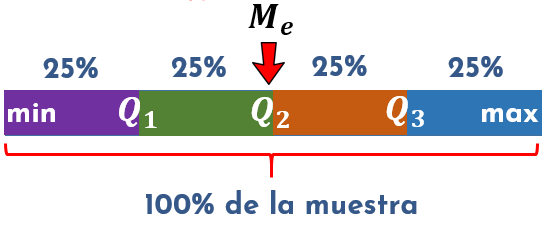



In [ ]:
q1 = np.quantile(data_df['A'], 0.25) # Numpy
q2 = np.quantile(data_df['A'], 0.50)
q3 = np.quantile(data_df['A'], 0.75)
print('Numpy')
print("Primer cuartil (Q1):", q1)
print("Segundo cuartil (Q2):", q2)
print("Tercer cuartil (Q3):", q3)
q1 = data_df['A'].quantile(0.25) # Pandas
q2 = data_df['A'].quantile(0.50)
q3 = data_df['A'].quantile(0.75)
print("----------------------------")
print('Pandas')
print("Primer cuartil (Q1):", q1)
print("Segundo cuartil (Q2):", q2)
print("Tercer cuartil (Q3):", q3)



## Percentiles

Los percentiles son valores que dividen un conjunto de datos en cien partes iguales, proporcionando una medida más detallada de la distribución. Algunos percentiles comunes son:

* Percentil 25 (P25): Es equivalente al primer cuartil (Q1) y representa el valor por debajo del cual el 25% de los datos caen.

* Percentil 50 (P50): Es equivalente al segundo cuartil (Q2) y representa la mediana de los datos.

* Percentil 75 (P75): Es equivalente al tercer cuartil (Q3) y representa el valor por debajo del cual el 75% de los datos caen.

* Percentil 90 (P90): Representa el valor por debajo del cual el 90% de los datos caen.


Los percentiles proporcionan información más detallada sobre cómo se distribuyen los datos, especialmente en los extremos de la distribución.


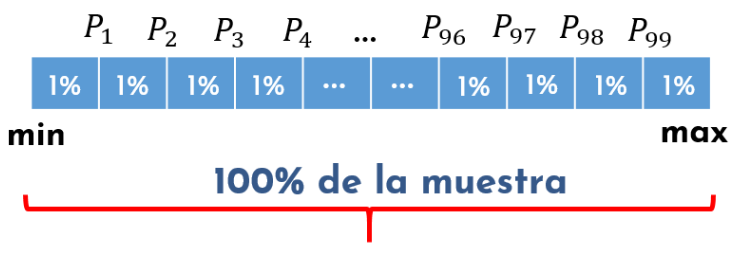



In [ ]:

p25 = np.percentile(data_df['A'], 25) # Numpy
p50 = np.percentile(data_df['A'], 50)
p75 = np.percentile(data_df['A'], 75)
print('Numpy')
print("Percentil 25 (P25):", p25)
print("Percentil 50 (P50):", p50)
print("Percentil 75 (P75):", p75)

p25_df = data_df['A'].quantile(0.25) # Pandas
p50_df = data_df['A'].quantile(0.50)
p75_df = data_df['A'].quantile(0.75)
print("----------------------------")
print('Pandas')
print("Percentil 25 (P25) con Pandas:", p25_df)
print("Percentil 50 (P50) con Pandas:", p50_df)
print("Percentil 75 (P75) con Pandas:", p75_df)

Tanto los cuartiles como los percentiles son útiles para resumir y analizar grandes conjuntos de datos, y son ampliamente utilizados en campos como la estadística, la investigación social, la economía y muchos otros. Estas medidas permiten comprender mejor la distribución, la dispersión y los valores atípicos de los datos.

📝 **Ejercicio**

Sea el siguiente conjunto de datos almacenado en el DataFrame `estudiantes_df`.


In [ ]:
est_d = {
  'Nombre': ['Lucas','Marcela','Fede','Sol','Sol'],
  'Edad': [49, 26, 37, 40, 35],
  'GradoAcademico': ['Bachiller','Licenciado','Magister','Doctorado','Licenciado']
}

# Crear DataFrame
estudiantes_df = pd.DataFrame(est_d)


In [ ]:
estudiantes_df

¿Cual es valor promedio, mínimo y máximo de la variable Edad?

In [ ]:
est_s = estudiantes_df['Edad']
mean = est_s.mean()
min = est_s.min()
max = est_s.max()
print(mean,min,max)

¿Qué tan dispersos están los valores de edad en relación a su valor promedio?
Calcular la desviación estándar poblacional

In [ ]:
est_s = estudiantes_df['Edad']
print(est_s.std(ddof=0))

¿Cuál es el grado acádemico más común entre los estudiantes?

In [ ]:
gradoAcad_s = estudiantes_df['GradoAcademico']
print(gradoAcad_s.mode())

# Ejemplo de uso de estadística descriptiva

---



El método describe() del objeto Dataframe devuelve una descripción de los datos en el DataFrame.

Si el DataFrame contiene datos numéricos, la descripción contiene esta información para cada columna:

* count: la cantidad de valores no vacíos.
* mean: el valor promedio (media).
* std: la desviación estándar.
* min: el valor mínimo.
* 25%: el percentil del 25 %*.
* 50%: el percentil del 50 %*.
* 75%: el percentil del 75 %*.
* max: el valor máximo.

In [ ]:
data_df.describe() # Describe


📝 **Ejercicio**

Sea el siguiente conjunto de datos almacenados en el DataFrame `estudiantes_df`.**texto en negrita**




In [ ]:
```
# Importar librería numpy para llamar a random
import numpy as np

# Diccionario est_d

est_d = {
  'Nombre': ['Lucas','Marcela','Fede','Sol,'Sol'],
  'Edad': [18,10,20,15]
}
```

---
# 1.5 Preparación y preprocesamiento de datos
---


## 1.5.1 Codificación de variables categóricas


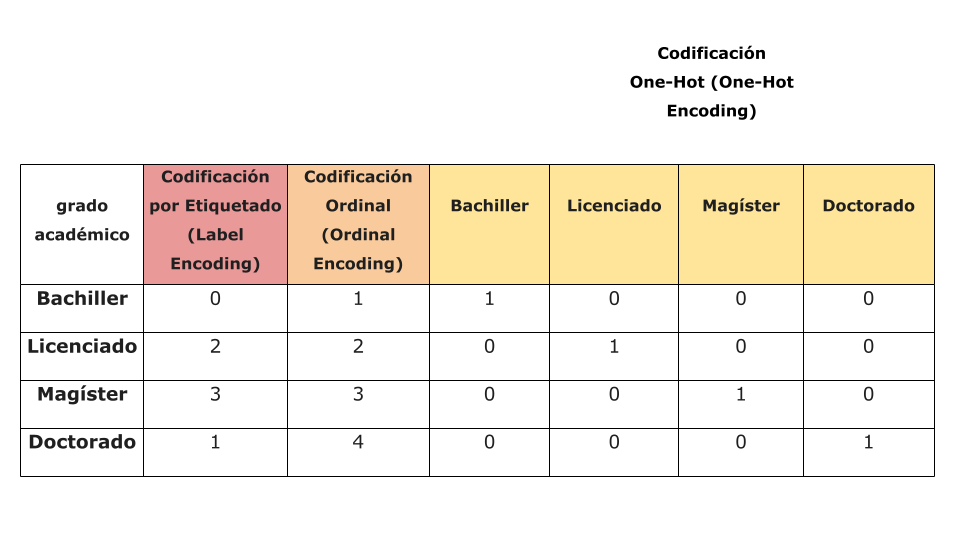

In [ ]:
reseVinoArgChi_df = reseVino_df.loc[reseVino_df['country'].isin(['Argentina','Chile']),['country','variety','points','price']]
reseVinoArgChi_df.head(2)

Para explorar las tres técnicas utilizaremos el conjunto de datos de grados acádemicos y la libreria scikit-learn de Python.

In [ ]:
# Importar biblioteca para la manipulación de datos
import pandas as pd

# Crear el conjunto de datos sobre grados académicos (Bachiller, Licenciado, Magíster y Doctorado).
# Variable categórica ordinal
educ_ls= ["Bachiller","Bachiller","Bachiller", "Licenciado", "Magíster","Magíster","Doctorado"]
data = {'country': educ_ls}

# Crear dataframe
reseVinoArgChi_df = pd.DataFrame(data)

# Mostrar
display(reseVinoArgChi_df)

### Codificación por Etiqueta (Label encoding)

La Codificación por Etiquetas es una técnica que codifica valores categóricos a números enteros. Técnica simple y rápida de implementar aunque puede introducir relaciones numéricas ficticias en variables categóricas nominales como color de un automóvil (Negro, Blanco, Rojo, Azul, Otros) o géneros de libros (Narrativa, Lírica y Dramática).

En Python para realizar la Codificación por Etiquetas se puede usar el módulo `LabelEncoder` de la biblioteca `sklearn.preprocessing`. En donde cada categoría es un entero que comienza en 0 y termina en n-1, donde n es el número de categorías. Veamos esto con el ejemplo.



Empecemos con `LabelEncoder`

In [ ]:
from sklearn.preprocessing import LabelEncoder

codif_etiqueta = LabelEncoder() # Inicializar la clase LabelEncoder. Crear instancia

reseVinoArgChi_df['LABEL_country_codif'] = codif_etiqueta.fit_transform(
    reseVinoArgChi_df['country']
    ) # Entrenar y transformar. LLamar al método fit_transform

display(reseVinoArgChi_df[['country','LABEL_country_codif']])

In [ ]:
codif_etiqueta.inverse_transform(reseVinoArgChi_df['LABEL_country_codif'])

In [ ]:

categorias_codifs = codif_etiqueta.classes_ # Si quisieramos ver las valoras asignados a las categorías. classes_

correspondencia = {} # Crear un diccionario para almacenar la correspondencia

for i, categoria in enumerate(categorias_codifs):
    correspondencia[categoria] = i # Asignar la correspondencia entre las categorías y los números

print(correspondencia)

La Codificación por Etiquetado no es la mejor técnica. Para el ejemplo, se esperaría desde el grado académico más bajo hasta el más avanzado ('Bachiller'< 'Licenciado'< 'Magíster'<'Doctorado') tener asignado los valores [0,1,2,3] y no [0,2,3,1]. Esto se debe a que asigna por orden alfabético.


Ante este problema, existe la posibilidad de utilizar Codificación Ordinal, útil para variables ordinales.

### Codificación Ordinal (Ordinal Encoding)
Está técnica asignan un valor numérico a cada categoría en función de su orden o jerarquía natural.
En Python, se puede utilizar la clase `OrdinalEncoder` de la biblioteca `sklearn.preprocessing`. Veamos como aplicar al ejemplo de grados académicos:

In [ ]:

from sklearn.preprocessing import OrdinalEncoder

codif_ordinal = OrdinalEncoder( # Inicializar la clase OrdinalEncoder
    categories=[['Chile','Argentina']], # para indicar el orden esperado
    dtype= 'int' # por defecto np.float64
    )

reseVinoArgChi_df['ORDINAL_country_codif']  = codif_ordinal.fit_transform(
    reseVinoArgChi_df[['country']]
    ) # Entrenar y transformar

display(display(reseVinoArgChi_df[['country','ORDINAL_country_codif']]))

In [ ]:

reseVinoArgChi_df['ORDINAL_country_codif'] = reseVinoArgChi_df['ORDINAL_country_codif'] + 1

display(reseVinoArgChi_df)

Algunas características clave de la Codificación Ordinal son:

1. **Asignación de valores numéricos**: A cada categoría única en la variable categórica se le asigna un valor numérico único en función de su orden o jerarquía. Los valores numéricos se asignan de manera secuencial, comenzando desde 0, hasta el número total de categorías menos 1.

2. **Preservación del orden**: La Codificación Ordinal conserva la información de orden o jerarquía entre las categorías. Esto significa que las categorías con valores numéricos más altos representan un mayor orden o jerarquía en comparación con las categorías con valores numéricos más bajos.

3. **Aplicación en variables categóricas ordinales**: La Codificación Ordinal es especialmente útil cuando se trabaja con variables categóricas que tienen un orden lógico predefinido como el ejemplo de grados académicos, clasificaciones (bajo, medio, alto) o tamaños (pequeño, mediano, grande), etc.



### Codificación One-Hot (One-Hot Enconding)

La codificación One-Hot es una técnica utilizada para convertir variables categóricas en una representación numérica binaria. Esta técnica se utiliza cuando las variables categóricas no tienen un orden inherente, variables nominales, y se desea representar cada categoría como una columna binaria separada.

La biblioteca `sklearn.preprocessing` en Python proporciona la clase `OneHotEncoder` que se puede utilizar para realizar la codificación One-Hot. A continuación se muestra un ejemplo de cómo utilizar OneHotEncoder:

In [ ]:

from sklearn.preprocessing import OneHotEncoder

codif_onehot = OneHotEncoder() # Inicializar clase OneHotEncoder

columnas_codif  = codif_onehot.fit_transform(
    reseVinoArgChi_df[['country']]
    ) # Entrenar y transformar los datos.

print("Matriz de columnas:",columnas_codif.toarray())


In [ ]:

# Crear dataframes con las nuevas características codifs One-Hot
onehot_df = pd.DataFrame(columnas_codif.toarray(), columns= codif_onehot.get_feature_names_out(['country']))

educ_onehot_df = pd.concat([reseVinoArgChi_df, onehot_df], axis=1) # concatenar el DataFrame codificado One-Hot

display(educ_onehot_df.iloc[:,6:])

Está técnica no introduce relaciones ficticias entre categorías aunque aumenta la cantidad de atributos o variables en el conjunto de datos si hay mucha cantidad de categorías asociadas a la variable a codificar.

Para identificar otras técnicas implementadas en scikit-learn click en:
[Documentación  de scikit-learn para codificar características categóricas](https://contrib.scikit-learn.org/category_encoders/)


📝 **Ejercicio**

Sea el siguiente conjunto de datos almacenado en el DataFrame `estudiantes_df`.


In [ ]:
est_d = {
  'Nombre': ['Lucas','Marcela','Fede','Sol','Sol'],
  'Edad': [49, 26, 37, 40, 35],
  'GradoAcademico': ['Bachiller','Licenciado','Magister','Doctorado','Licenciado']
}

# Crear DataFrame
estudiantes_df = pd.DataFrame(est_d)

In [ ]:
estudiantes_df['GradoAcademico'].unique()

¿Cómo codificar la variable categórica ordinal 'GradoAcademico' de manera que que los valores asignados respeten el orden de menor a mayor grado ?
es decir:  ['Bachiller', 'Licenciado', 'Magister', 'Doctorado']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

codif_ordinal = OrdinalEncoder( # Inicializar la clase OrdinalEncoder
    categories=[['Bachiller', 'Licenciado', 'Magister', 'Doctorado']],
    dtype= 'int'
    )

codif_ordinal.fit_transform(estudiantes_df[['GradoAcademico']])

## 1.5.2 Estandarización y Normalización

La estandarización y la normalización de variables númericas son pasos esenciales del preprocesamiento de datos que ayudan a garantizar que los modelos de ML puedan aprender de los datos de manera eficaz, transforman los valores de las variables a una escala similar, garantizando que todas las variables contribuyan por igual al proceso de aprendizaje del modelo. Por ejemplo, ingresos en miles de dólares y edad en años están en diferentes escalas. Los modelos pueden dar prioridad a los valores más grandes, lo que provoca un sesgo en las predicciones.


Los temas a explorar a continuación son:
* **Estandarización**: Escalado de puntaje Z (Z-score).
* **Normalización**: Escalamiento mínimo-máximo.


### Estandarización

La **estandarización**, también conocida como **normalización z-score**, es una técnica comúnmente utilizada en el preprocesamiento de datos para transformar las variables numéricas de manera que tengan una media de 0 y una desviación estándar de 1. su fórmula está determinada por:

$$Z = \frac{X-\mu}{\sigma}$$

donde $X$ es el valor observado $\mu$ es la media en el conjunto de datos y $\sigma$ es desviación estándar en el conjunto de datos.



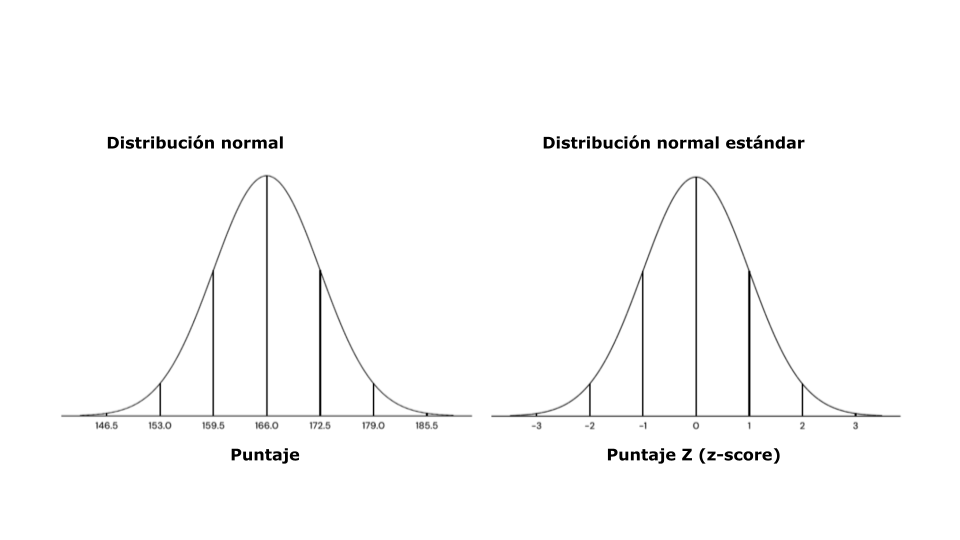

En Python, se puede utilizar la clase `StandardScaler` de la biblioteca `sklearn.preprocessing` para realizar la estandarización. Para ello planteemos el ejemplo de la edad:

In [ ]:
# Crear dataframe del ejemplo edad
edad_ls =  [18, 20, 22, 21, 19, 23, 18, 24]
data = { 'edad': edad_ls }
edad_df = pd.DataFrame(data)

# Imprimir los primeras 5 instancias
edad_df.head(5)

In [ ]:
m = np.mean(edad_ls)
m

In [ ]:
s = np.var(edad_ls, ddof=0)
s

In [ ]:
std = np.std(edad_ls, ddof=0)
std

In [ ]:
(edad_ls[1]-m)/std

In [ ]:
min = np.min(edad_ls)
min

In [ ]:
max = np.max(edad_ls)
max

In [ ]:
(edad_ls[1]-min)/(max-min)

In [ ]:
# Mostrar estadísticas (resumen). Para reforzar estos temas te sugerimos volver a ver los videos de estadísticas descriptiva
# Tiene en cuenta la varianza muestral (n-1)
edad_df.describe()

In [ ]:
reseVinoArgChi_df['points']

In [ ]:
# Importar biblioteca
from sklearn.preprocessing import StandardScaler
import numpy as np


# Instanciar la clase StandardScaler
escala_puntoZ = StandardScaler()

# Entrenar y transformar. Nueva variable
edad_df['Z_edad'] = escala_puntoZ.fit_transform(edad_df[['edad']])

# Imprimir primeras 5 instancias.  A cada valor le resto mean	33.750000 y lo dividio por std	18.42 (de la varianza poblacional)
print('Media {} y desvío estándar {} utilizados '. format(escala_puntoZ.mean_[0], np.sqrt(escala_puntoZ.var_)[0]))
edad_df.head(5)


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

escala_puntoZ = StandardScaler() # Instanciar la clase StandardScaler

reseVinoArgChi_df['Z_points'] = escala_puntoZ.fit_transform( # Entrenar y transformar. Nueva variable
    reseVinoArgChi_df[['points']]
    )

print('Media {} y desvío estándar {} utilizados '. format(escala_puntoZ.mean_[0], np.sqrt(escala_puntoZ.var_)[0]))

display(reseVinoArgChi_df[['points','Z_points']].head(5))


In [ ]:
# Importar biblioteca
import matplotlib.pyplot as plt

# Crear gráfica
fig, axs = plt.subplots(2,1, figsize=(15, 6))
axs[0].hist(reseVinoArgChi_df[['points']])
axs[0].set_title("Histograma de 'points'")
axs[1].hist(reseVinoArgChi_df[['Z_points']])
axs[1].set_title("Histograma de 'points' luego de estandarizar  - Puntaje Z" )
fig.tight_layout()

Los datos no cambian su distribución.

**Cuando usar**

La puntuación z es más adecuada si los datos son numéricos y se distribuyen de manera aproximadamente normal o simétrica. En algoritmos basados en el gradiente como Máquina de Vectores de Soporte (Support Vector Machine, SVM) Regresión lineal o Regresión logística. También en el Análisis de Componentes Principales (Principal Component Analysis, PCA).

### Normalización

La normalización es otro proceso común en el preprocesamiento de datos que se utiliza para escalar los valores de una variable. A diferencia de la estandarización, que centra los datos alrededor de cero y los escala utilizando la desviación estándar, la normalización ajusta los valores en un rango específico, generalmente entre 0 y 1.




#### Escalamiento mínimo-máximo, (Min-Max Scaling)

Existen varios métodos de normalización, pero uno de los más comunes es el Min-Max Scaling. En este enfoque, se transforman los datos a un rango específico utilizando la siguiente fórmula:



$X_{nueva} = \frac{X - X_{min}}{X_{max} - X_{min}}$




donde $X$ es el valor observado, $X_{min}$ es el valor mínimo en el conjunto de datos y $X_{max}$ es el valor máximo en el conjunto de datos. La fórmula normaliza los valores a un rango de [0, 1].

Python ofrece la clase `MinMaxScaler()` de `sklearn.preprocessing`.Veamos como se aplica en el ejemplo edad:


In [ ]:
# Importar biblioteca
from sklearn.preprocessing import MinMaxScaler


escalado_MinMax = MinMaxScaler() # Inicializar la clase MinMaxScaler

reseVinoArgChi_df[['MINMAX_points']] = escalado_MinMax.fit_transform( # Entrenar y transformar
    reseVinoArgChi_df[['points']]
    )

print("Para la variable Points Max. = {} Mín. = {}".format(reseVinoArgChi_df[['points']].max(),reseVinoArgChi_df[['points']].min()))
display(reseVinoArgChi_df[['points','MINMAX_points']].sort_values(by='MINMAX_points').head(5))


In [ ]:
# Crear gráfica

fig, axs = plt.subplots(2,1, figsize=(15, 6))
axs[0].hist(reseVinoArgChi_df[['points']])
axs[0].set_title("Histograma de 'points'")
axs[1].hist(reseVinoArgChi_df[['MINMAX_points']])
axs[1].set_title("Histograma de 'points' luego de normalizar - Escalamiento mínimo-máximo" )
fig.tight_layout()


Como se puede ver en la fórmula, el escalado mínimo-máximo conserva el orden relativo de los valores, pero los comprime en un rango específico. El escalamiento Min-Max es ideal cuando los datos no siguen una distribución normal y es importante mantener la relación entre los valores originales. Este método ajusta los datos a un rango específico, como [0, 1], siendo útil en modelos sensibles a magnitudes absolutas, métodos basados en distancias (por ejemplo, k-means o K-Nearest Neighbors). Evite usarlo si los datos contienen valores atípicos, ya que estos pueden comprimir el rango de los valores restantes.



Otras normalizaciones:
* MaxAbsScaler: escala cada variable por su valor absoluto máximo. Rango [-1, 1].
* RobustScaler: resulta particularmente útil cuando se trabaja con conjuntos de datos que contienen valores atípicos.

Todos estos y muchos más están implementados en scikit-learn, click en:[Documentación de preprocesamiento ](https://scikit-learn.org/stable/modules/preprocessing.html)

📝 **Ejercicio**

Sea el siguiente conjunto de datos almacenado en el DataFrame `estudiantes_df`.

In [ ]:
est_d = {
  'Nombre': ['Lucas','Marcela','Fede','Sol','Sol'],
  'Edad': [49, 26, 37, 40, 35],
  'GradoAcademico': ['Bachiller','Licenciado','Magister','Doctorado','Licenciado']
}

# Crear DataFrame
estudiantes_df = pd.DataFrame(est_d)

Normalizar la variedad edad por puntaje Z o Z-score

In [ ]:

from sklearn.preprocessing import StandardScaler
import numpy as np


# Instanciar la clase StandardScaler
escala_puntoZ = StandardScaler()

# Entrenar y transformar. Nueva variable
escala_puntoZ.fit_transform(estudiantes_df[['Edad']])

### Manejo de valores atípicos (outliers)

#### Identificación de valores atípicos univariados


#### Visualización por Diagrama de caja (Box-plot)

In [ ]:
# Diagrama de caja
fig, ax = plt.subplots(figsize=(15, 3))
ax.boxplot(reseVinoArgChi_df[['points']], vert=False)
ax.set_title("Diagrama de caja (Box Plot) para 'points'")


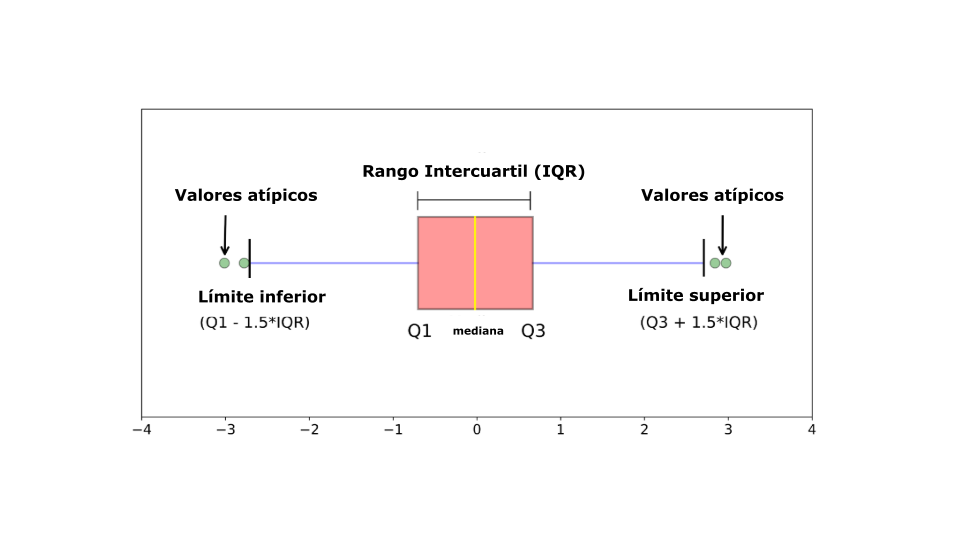

In [ ]:
# Calcular cuartíles
Q1 = reseVinoArgChi_df['points'].quantile(0.25)
Q3 = reseVinoArgChi_df['points'].quantile(0.75)

# Calcular rango intercualtílico
IQR = Q3 - Q1

# Calcular límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Detectar valores atípicos
atipicos_IQR_df = reseVinoArgChi_df[(reseVinoArgChi_df['points'] < limite_inferior) | (reseVinoArgChi_df['points'] > limite_superior)]

# Imprimir resultados
print("Atipicos en 'points' por IQR:")
atipicos_IQR_df['points']


El método IQR es simple de aplicar, es conveniente en datos no distribuidos normalmente Sin embargo, tiene ciertas desventajas como el tamaño de la muestra, especialmente en conjuntos de datos más pequeños, puede afectar a su precisión a la hora de reflejar la verdadera dispersión de los datos. Detecta atípicos solo en una variable a la vez, lo que puede ser insuficiente si los valores atípicos están en combinaciones de variables (atípicos multivariados).

#### Método de puntuación Z (Z-score)


In [ ]:

from scipy import stats
from sklearn.preprocessing import StandardScaler
import numpy as np


z_puntaje_point = np.abs(stats.zscore(reseVinoArgChi_df['points'])) ## para trabajar con valores positivos
reseVinoArgChi_df['points_z_puntaje'] = z_puntaje_edad

# Setear umbral de puntaje z
z_umbral = 3

# Identificar valor atípico
atipicos_estandar_df = reseVinoArgChi_df[reseVinoArgChi_df['points_z_puntaje']  >  z_umbral]

# Imprimir resultados
display("Atipicos en 'point' por puntaje Z :",atipicos_estandar_df['points_z_puntaje'])

Si graficamos las puntuaciones Z para cada observación y característica de los datos, ya podemos empezar a detectar algunos valores atípicos.
En este gráfico de dispersión de puntuaciones Z, cada punto representa la puntuación Z de un punto de datos individual. La línea discontinua roja indica el umbral de puntuación Z elegido (en este caso, 3). Los valores atípicos se identifican como puntos por encima de este umbral.

Continuando con el ejemplo, en edad hay un valor atípico claramente capturado.


In [ ]:
# Crear gráfica
fig, ax = plt.subplots(figsize=(15, 3))
ax.scatter(reseVinoArgChi_df['points'] , reseVinoArgChi_df['points_z_puntaje'] , color='blue', label='Z-Scores')
ax.set_title("Puntajes Z (Z-Scores) para 'point'")
plt.axhline(y=z_umbral, color='red', linestyle='--', label='Umbral')
plt.legend()

### Eliminación de valores atípicos


In [ ]:
# Seleccionar edad dentro de los limites
datos_sinAtipicos_IQR_df = reseVinoArgChi_df[(reseVinoArgChi_df['points'] >= limite_inferior) & (reseVinoArgChi_df['points']  <= limite_superior)]
display("Estadística para 'points' con valores atípicos ",reseVinoArgChi_df['points'] .describe())
display("Estadística para 'points' sin valores atípicos por IQR ",datos_sinAtipicos_IQR_df['points'].describe())


Los cambios observados después de la eliminación de los valores atípicos se describen a continuación:
* **Cambio de la edad media**: la edad media, después de eliminar los valores atípicos, disminuyó ligeramente de 33,75 a
aproximadamente 28,27. Esta reducción sugiere que los valores atípicos eliminados eran individuos mayores.
* **Cambio de la desviación estándar para la edad**: la desviación estándar para la edad disminuyó de 18,90 a 8,75, lo que indica que la dispersión de edades se volvió ligeramente más estrecha después de la eliminación de los valores atípicos, lo que
probablemente contribuyó a una mayor variabilidad en el conjunto de datos original.
*  **Valores mínimos y máximos de edad**: la edad mínima permaneció igual, 18, mientras que la edad máxima disminuyó de 90 a 45, lo que indica que los individuos mayores (posibles valores atípicos) se eliminaron durante el manejo de los valores atípicos.


La eliminación de valores atípicos condujo a una disminución tanto de la edad media como de la desviación estándar, así como a un ligero aumento de la puntuación media de la prueba. Si bien la eliminación de valores atípicos puede mejorar la calidad de los datos, especialmente cuando se deben a errores de entrada de datos o imprecisiones de medición, también reduce la variabilidad del conjunto de datos. Si los valores atípicos representan una variabilidad real en la Poblacion, su eliminación podría distorsionar la imagen general de los datos. Para el ejemplo de edad, no estaríamos contemplado a los adultos mayores. Por lo tanto, se debe considerar cuidadosamente si los valores atípicos representan puntos de datos genuinos o errores.



### Resumen y caso de uso

**1. Codificación de características categóricas**
* Codificación de etiqueta (Label encoding)
* Codificación Ordinal
* Codificación One-Hot (One-Hot encoding)

**2.Estandarización y Normalización**
* Estandarización: escalado de puntaje Z (Z-score)
* Normalización: escalado por mínimo-máximo.

**3.Detección y eliminación de valores atípicos (outliers)**
* Visualización por Diagrama de caja (Box-plot)
* Método por Rango Intercuartil (Interquartile Range, IQR)
* Método por puntuación Z (Z-score)
* Conocimiento de dominio
* Eliminación de valores atípicos por IQR
